# Predicting the age of abalone through decision tree regression and random forest regression

Author: Taimian Qiao

Course Project, UC Irvine, Math 10, F23

## Introduction
The data comes from Marine Resources Division Marine Research Laboratories - Taroona Department of Primary Industry and Fisheries, and counts several basic vital signs of 4,177 abalone. In the introduction of the data set, it is mentioned: The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Therefore, we It is hoped that by analyzing the following data and then using machine learning, the age of abalone can be determined based only on easily measurable physical quantities.


## Load the Data

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [ ]:
file_name = 'dataset_187_abalone.arff'
data,meta= arff.loadarff(file_name)
df = pd.DataFrame(data)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,b'M',0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,b'15'
1,b'M',0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,b'7'
2,b'F',0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,b'9'
3,b'M',0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,b'10'
4,b'I',0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,b'7'
...,...,...,...,...,...,...,...,...,...
4172,b'F',0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,b'11'
4173,b'M',0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,b'10'
4174,b'M',0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,b'9'
4175,b'F',0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,b'10'


In [ ]:
df.shape

(4177, 9)

we need to check if there are any nah and drop them 

In [ ]:
df = df.dropna(axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,b'M',0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,b'15'
1,b'M',0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,b'7'
2,b'F',0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,b'9'
3,b'M',0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,b'10'
4,b'I',0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,b'7'
...,...,...,...,...,...,...,...,...,...
4172,b'F',0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,b'11'
4173,b'M',0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,b'10'
4174,b'M',0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,b'9'
4175,b'F',0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,b'10'


In [ ]:
df.shape

(4177, 9)

We are very lucky that there are no nah values ​​in our data set. According to the introduction of the data set, the ring number plus 1.5 is the age of the abalone, so we add a new column in df named age to directly display the age of the abalone.

In [ ]:
df['Class_number_of_rings'] = df['Class_number_of_rings'].astype(int)
df['age'] = df['Class_number_of_rings']+1.5
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings,age
0,b'M',0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,b'M',0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,b'F',0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,b'M',0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,b'I',0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,b'F',0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,b'M',0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,b'M',0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,b'F',0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In the description of the data source, it is mentioned that the minimum value of height is 0, but in fact the height of abalone cannot be equal to 0, so this is an outlier that needs to be eliminated.

In [ ]:
df= df[df['Height'] != 0]
(df['Height'] == 0).sum()

0

Since the Sex feature is nominal (no ordering relationship), we will use one-hot encoding. This will create additional columns, one for each category, with a value of 1 or 0 indicating the presence or absence of the corresponding category in each sample.

In [ ]:
df= pd.get_dummies(df, columns=['Sex'])
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings,age,Sex_b'F',Sex_b'I',Sex_b'M'
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


## Draw charts


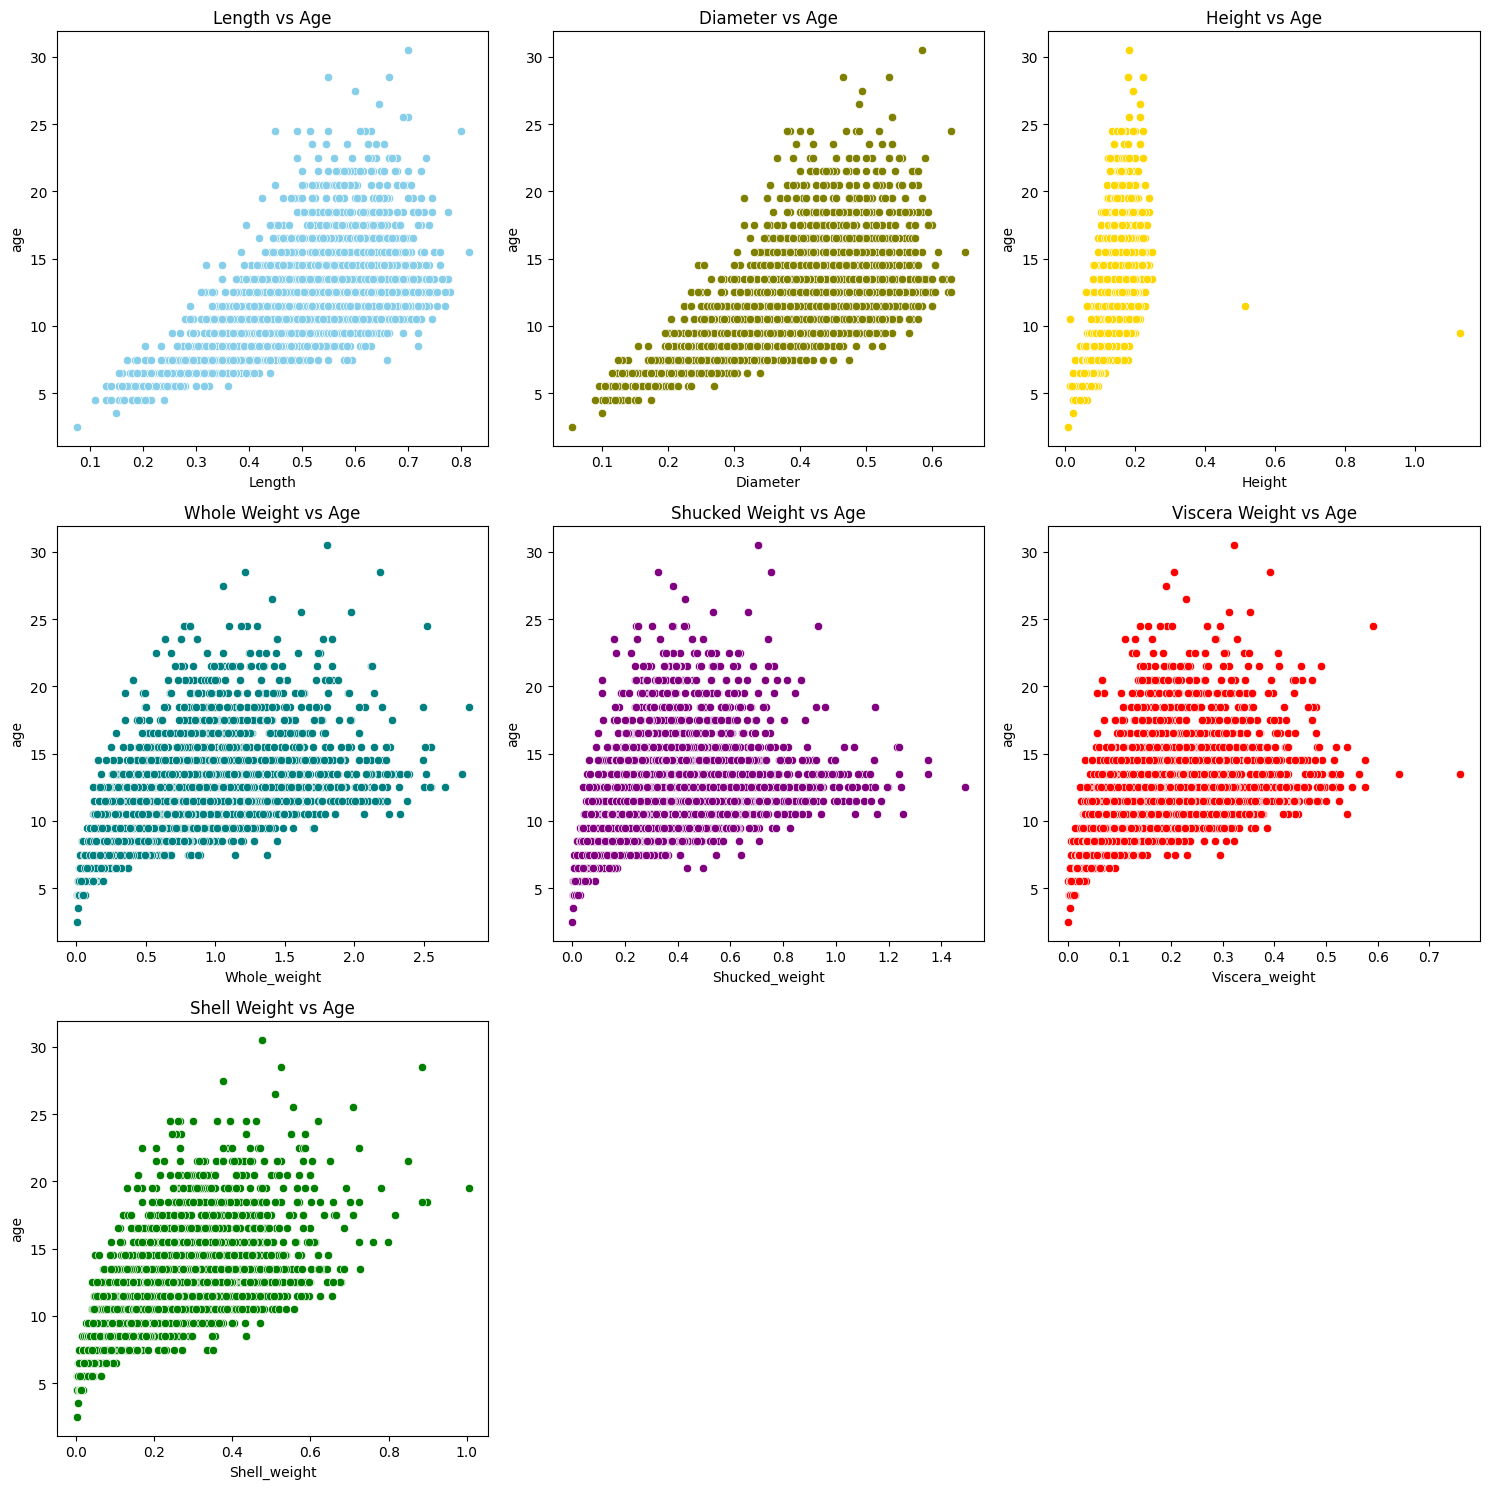

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
sns.scatterplot(x='Length', y='age', data=df, ax=axes[0, 0], color="skyblue").set_title('Length vs Age')
sns.scatterplot(x='Diameter', y='age', data=df, ax=axes[0, 1], color="olive").set_title('Diameter vs Age')
sns.scatterplot(x='Height', y='age', data=df, ax=axes[0, 2], color="gold").set_title('Height vs Age')
sns.scatterplot(x='Whole_weight', y='age', data=df, ax=axes[1, 0], color="teal").set_title('Whole Weight vs Age')
sns.scatterplot(x='Shucked_weight', y='age', data=df, ax=axes[1, 1], color="purple").set_title('Shucked Weight vs Age')
sns.scatterplot(x='Viscera_weight', y='age', data=df, ax=axes[1, 2], color="red").set_title('Viscera Weight vs Age')
sns.scatterplot(x='Shell_weight', y='age', data=df, ax=axes[2, 0], color="green").set_title('Shell Weight vs Age')
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
plt.tight_layout()
plt.show()

From the chart above, we can clearly see that the physical quantity of abalone increases in roughly proportion to its age. And as it ages, its dispersion range will become larger, which is likely to affect subsequent predictions. But let’s move on first. Considering that the distribution of these data is too large, linear regression is likely to produce large errors here. Therefore, we skip linear regression and directly use decision tree and random forest regression. Before that, we first create a training set and a test set.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('age', axis=1) 
y = df['age']              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
train_size = X_train.shape[0]
test_size = X_test.shape[0]
train_size, test_size

(3131, 1044)

## Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_regressor.predict(X_test)
y_pred 

array([16.5,  8.5, 12.5, ..., 14.5,  8.5, 16.5])

We have tried to predict the age of abalone using decision tree regression, let's test the accuracy of this method.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.0038314176245210726, 0.9996527350441565)

Mean squared error (MSE) is a measure of a model's prediction error. The lower the MSE value, the higher the prediction accuracy of the model. In this case, the MSE is about 0.00383, which indicates that the error between the model's prediction and the actual age is small

The coefficient of determination (R²) represents the model's ability to explain the variation in the data. Its value is between 0 and 1, and the closer the value is to 1, the better the model performance. The R² of the current model is 0.999652, which indicates that the model can explain approximately 99% of the variation in the target variable, indicating that the model has strong explanatory power.

## RandomForest
Next let’s try it using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_forest = forest_regressor.predict(X_test)
y_pred_forest

array([16.5,  8.5, 12.5, ..., 14.5,  8.5, 16.5])

In [ ]:
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

mse_forest, r2_forest

(0.00018065134099616952, 0.999983626457332)

In this case, the MSE is about 0.00018, which indicates that the error between the model's prediction and the actual age is small

The R² of the current model is 0.99998, which indicates that the model can explain approximately 99% of the variation in the target variable, indicating that the model has strong explanatory power.

## Summary
Judging from the returned MSE and R^2 data, both decision tree regression and random forest regression analyzed the given data very well and performed regression. This shows that these two data processing methods perform very well in dealing with the above problems, which also proves that we do not necessarily need to cut the shell through the cone, staining it, and counting the number of rings through a microscope. way to determine the age of abalone. It can be predicted through the above model and the physical quantities of abalone, and good results can be obtained.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?
https://www.openml.org/search?type=data&status=active&id=183&sort=runs
 Original owners of database: Marine Resources Division Marine Research Laboratories - Taroona Department of Primary Industry and Fisheries, Tasmania GPO Box 619F, Hobart, Tasmania 7001, Australia (contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

* List any other references that you found helpful.
https://blog.csdn.net/u012949658/article/details/109613527 In this website, I learned how to convert data in arff format into csv format and import it into python to start analysis.
https://chat.openai.com  GPT played a great role in helping me provide the process and ideas for data analysis. It also helped me explain errors that occurred during the analysis process.